In this notebook, we're going to talk about the various ways that [`opencv`](https://opencv.org/) — the most popular library for working with image data – presents colors.

In [1]:
!pip install opencv-python
import cv2

# Important: Run this code cell each time you start a new session!

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


# RGB Colors

As mentioned earlier, the most common convention for storing image data is by using the ***red-green-blue (RGB)*** color system. This is an additive color model in which red, green, and blue light are added together in various ways to reproduce a broad array of colors. The way these colors combine is shown below:

<img src="https://drive.google.com/uc?id=1IZthxGPE0A1efO_Kwjbfw911khc5Uw_U" width=300px/>

Of course, you can represent colors other than the ones shown in that image. Some people find it helpful to think of the RGB space as a cube:

<img src="https://drive.google.com/uc?id=1M_BrhKjBKtKWoO9F09OnA0rNxXWOhLx0" width=300px/>

The color of a given pixel can be represented as three digits: the amount of red, green, and blue required to make that color. Each quantity can range from 0 to 255. The number 255 comes from the fact that 8 bits in binary can lead to $2^8 = 256$ possible values.

You will often fine places in the code below where numbers are casted to a specific data type in `numpy` called `uint8`, which designates an 8-bit unsigned integer. This is basically a special form of `int` that can only take on values between 0 and 255, and many of the popular libraries require that images are in this data format. Fortunately, this will be the case for most images that we load using libraries, but we will need to do some conversions manually when we're creating images from scratch.

This is how you would represent the colors above as tuples in RGB:

| Color | Tuple |
|:--------------:|:-----------:|
| Black | `(0, 0, 0)` |
| Red | `(255, 0, 0)` |
| Green | `(0, 255, 0)` |
| Blue | `(0, 0, 255)` |
| Yellow | `(255, 255, 0)` |
| Magenta | `(255, 0, 255)` |
| Cyan | `(0, 255, 255)` |
| White | `(255, 255, 255)` |

We can show that these are correct by creating a simple function that creates a $1 \times 1 \times 3$ array, representing a single pixel with 3 color channels. This function uses the `imshow()` function in `matplotlib` to show the pixel. You can ignore the optional `colorspace` parameter; we will revisit it shortly.

In [3]:
def create_pixel(color, colorspace=None):
    # Creates an array with the data type uint8
    img = np.ones((1, 1, 3), np.uint8)

    # Converts the tuple to a uint8 array
    img[:, :] *= np.uint8(color)

    # Show the image
    plt.figure(figsize=(1, 1))
    plt.imshow(img)
    plt.show()

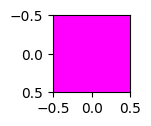

In [6]:
r = 255 #@param {type:"slider", min:0, max:255, step:1}
g = 0 #@param {type:"slider", min:0, max:255, step:1}
b = 255 #@param {type:"slider", min:0, max:255, step:1}

create_pixel((r, g, b))

# Other Color Spaces

While RGB is by far the most common convention for storing image data, there are other ways of defining colors that can make it easier to extract the information you require. We refer to these different systems as ***color spaces***.

You can change an image from one color space to another using `opencv.cvtColor()`. This function takes two arguments: an image and a special kind a variable provided by `opencv` that specifies the conversion you want to apply (e.g., `cv2.COLOR_GRAY2RGB`).

To make it easier to view a pixel in any color space, we're going to modify our `create_pixel()` function to take in an optional `conversion` argument.

In [8]:
def create_converted_pixel(color, conversion=None):
    # Creates an array with the data type uint8
    img = np.ones((1, 1, len(color)), np.uint8)

    # Converts the tuple to a uint8 array
    img[:, :] *= np.uint8(color)

    # Convert to a different color space if specified
    img_conv = cv2.cvtColor(img, conversion) if conversion else img

    # Show the image
    plt.figure(figsize=(1, 1))
    plt.imshow(img_conv)
    plt.show()

Let's look at three popular color spaces other than RGB:

***Grayscale*** is a color space with only one color channel. It has no color information, so it is essentially a black-and-white image with various shades of gray. The value of each pixel represents an intensity value. For photographs, the intensity corresponds to color brightness. For images like ultrasound scans, the intensity corresponds to the amount of signal reflected back to the sensor.

<img src="https://drive.google.com/uc?id=1ixPHG3RhQmfCJI997BcCjfmqZHxk8GEm" width=300px/>

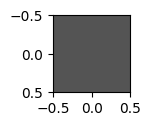

In [12]:
gray = 84 #@param {type:"slider", min:0, max:255, step:1}

create_converted_pixel((gray,), cv2.COLOR_GRAY2RGB)

The ***HSV*** color space has 3 channels that each describe different visual properties of a color:
1. **Hue (H)**: Hue refers to the dominant wavelength of light that gives color to an image, determining what part of the rainbow is going to be most prominent in the color. As illustrated in the image below, hue is typically represented as an angle ranging from 0 to 359 degrees. However, since `opencv` likes to work with 8-bit image data, it requires hue to lie between 0 and 179.
2. **Saturation (S)**: Saturation determines the vividness or dullness of a color. Ranging between 0 and 255, a higher saturation value indicates a more vivid color, while a lower saturation value results in a more muted or grayscale representation.
3. **Value (V)**: Value represents the brightness of a color. Ranging between 0 and 255, a higher value indicates a brighter color, while a lower value results in a darker color.

<img src="https://drive.google.com/uc?id=1NJlwZv2y1qYePYoVelAnzcKldEHOqYOb" width=300px/>

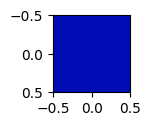

In [18]:
h = 118 #@param {type:"slider", min:0, max:179, step:1}
s = 255 #@param {type:"slider", min:0, max:255, step:1}
v = 182 #@param {type:"slider", min:0, max:255, step:1}

create_converted_pixel((h, s, v), cv2.COLOR_HSV2RGB)

The ***Lab*** color space (sometimes stylized L&ast;a&ast;b&ast;) has 3 channels designed to make it easier to distinguish perceptually different colors:
1. **Lightness (L)**: L represents the lightness component of the color. Ranging between 0 and 255, a higher lightness indicates a brighter color, while a lower lightness results in a darker color. Although it is functionally similar to the V channel in HSV, it is calculated in a different way and should therefore not be treated as interchangable.
2. **Green-Red ($a$)**: The $a$ component represents the color's position between green and red. Ranging between 0 and 255, lower $a$ values represent colors with more green, while higher $a$ values represent colors with more red.
3. **Blue-Yellow ($b$)**: The $b$ component represents the color's position between blue and yellow. Ranging between 0 and 255, lower $b$ values represent colors with more blue, while higher $b$ values represent colors with more yellow.

<img src="https://drive.google.com/uc?id=1y-Slx2tOm1ic93QIssDOubJzTtVInGpY" width=300px/>

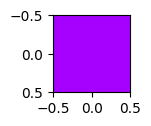

In [20]:
L = 115 #@param {type:"slider", min:0, max:255, step:1}
a = 255 #@param {type:"slider", min:0, max:255, step:1}
b = 0 #@param {type:"slider", min:0, max:255, step:1}

create_converted_pixel((L, a, b), cv2.COLOR_LAB2RGB)

# Why Are Color Spaces Useful?

Most libraries assume that images are encoded in RGB (if there are 3 color channels) or grayscale (if there is 1 color channel). However, you might find that analyzing images in another color space may make it easier for you to extract important information.

For example, let's say that we wanted to identify if a color is a shade of magenta. If we want to do this in the RGB case, we need to identify colors that have sufficiently higher values of R and B compared to G. The exact definition of 'shade of magenta' is debatable, but this is a rough implementation:

In [21]:
def check_if_magenta_rgb(rgb_color):
    # Split the color channels
    r, g, b = rgb_color

    # Check if the color is magenta and sufficiently bright / saturated
    is_magenta_hue = (r > 2*g and b > 2*g)
    is_saturated_and_bright = (r > 100 and b > 100)
    is_magenta = is_magenta_hue and is_saturated_and_bright

    # Display the results
    create_pixel(rgb_color)
    print(is_magenta)

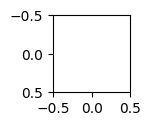

False


In [24]:
r = 255 #@param {type:"slider", min:0, max:255, step:1}
g = 255 #@param {type:"slider", min:0, max:255, step:1}
b = 255 #@param {type:"slider", min:0, max:255, step:1}

check_if_magenta_rgb((r, g, b))

If we knew the color was in HSV, however, we can use our intuition to analyze each channel independently:

In [25]:
def check_if_magenta_hsv(hsv_color):
    # Split the color channels
    h, s, v = hsv_color

    # Check if the color is magenta and sufficiently bright / saturated
    is_magenta_hue = 135 < h < 160
    is_saturated = s > 100
    is_bright = v > 100
    is_magenta = is_magenta_hue and is_saturated and is_bright

    # Display the results
    img = np.ones((1, 1, 3), np.uint8)
    img[:, :] *= np.uint8(hsv_color)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    create_pixel(img_rgb[0, 0, :])
    print(is_magenta)

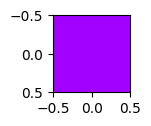

True


In [27]:
h = 139 #@param {type:"slider", min:0, max:179, step:1}
s = 255 #@param {type:"slider", min:0, max:255, step:1}
v = 255 #@param {type:"slider", min:0, max:255, step:1}

check_if_magenta_hsv((h, s, v))